# Import libraries

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic_df.shape

(891, 12)

In [20]:
titanic_df = titanic_df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [9]:
titanic_df = titanic_df.dropna()

titanic_df.shape

(712, 8)

In [10]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

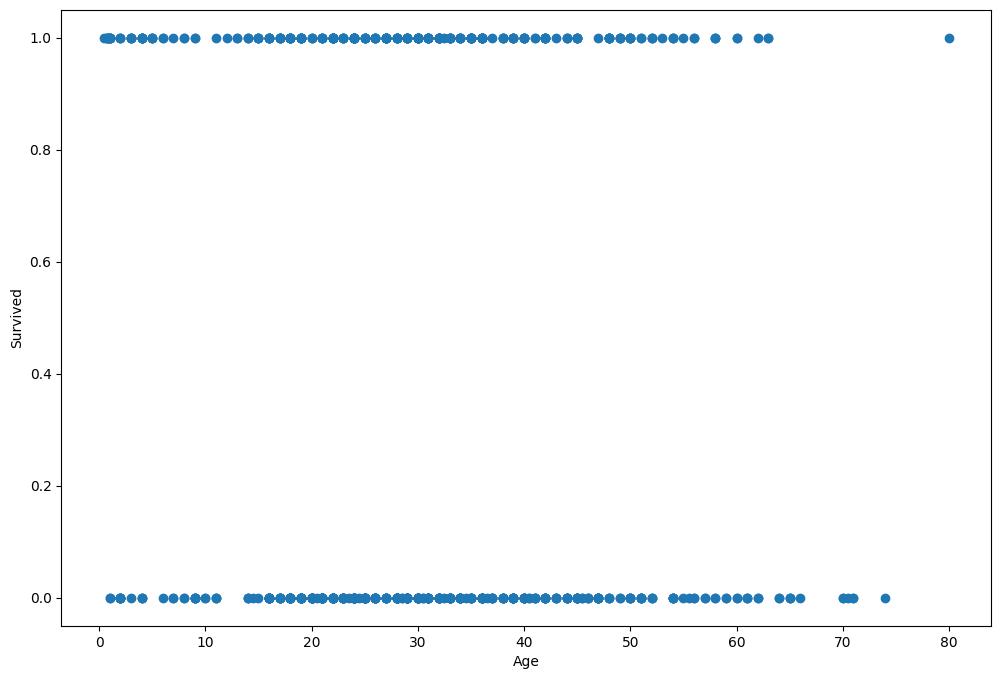

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(titanic_df['Age'],titanic_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

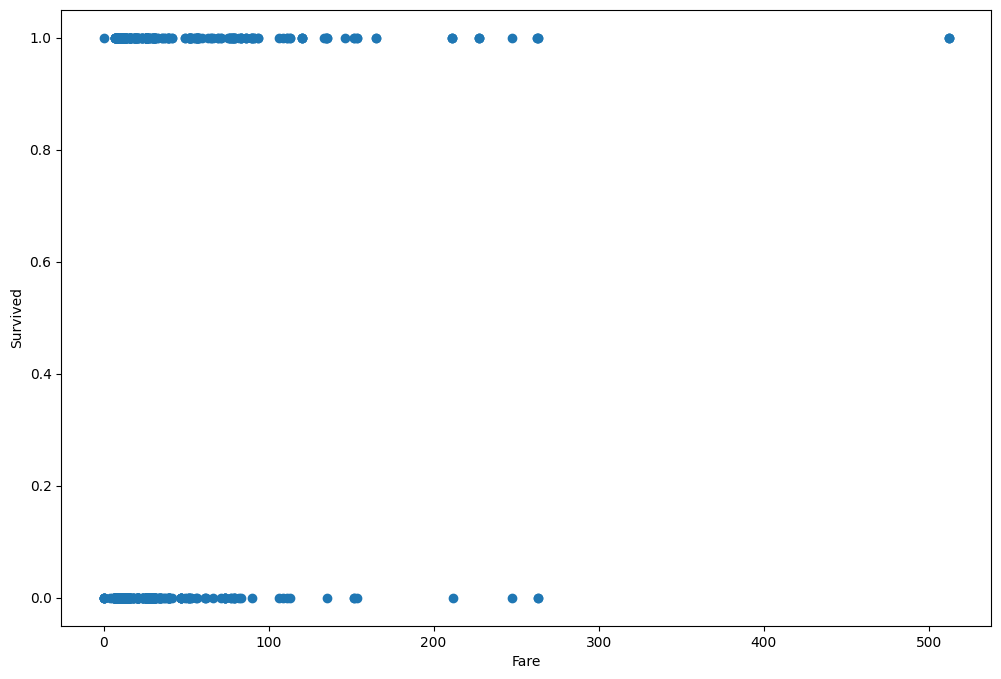

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(titanic_df['Fare'],titanic_df['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

In [18]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [19]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [21]:
titanic_df_corr = titanic_df.drop(['Sex','Embarked'],axis=1).corr()

titanic_df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<Axes: >

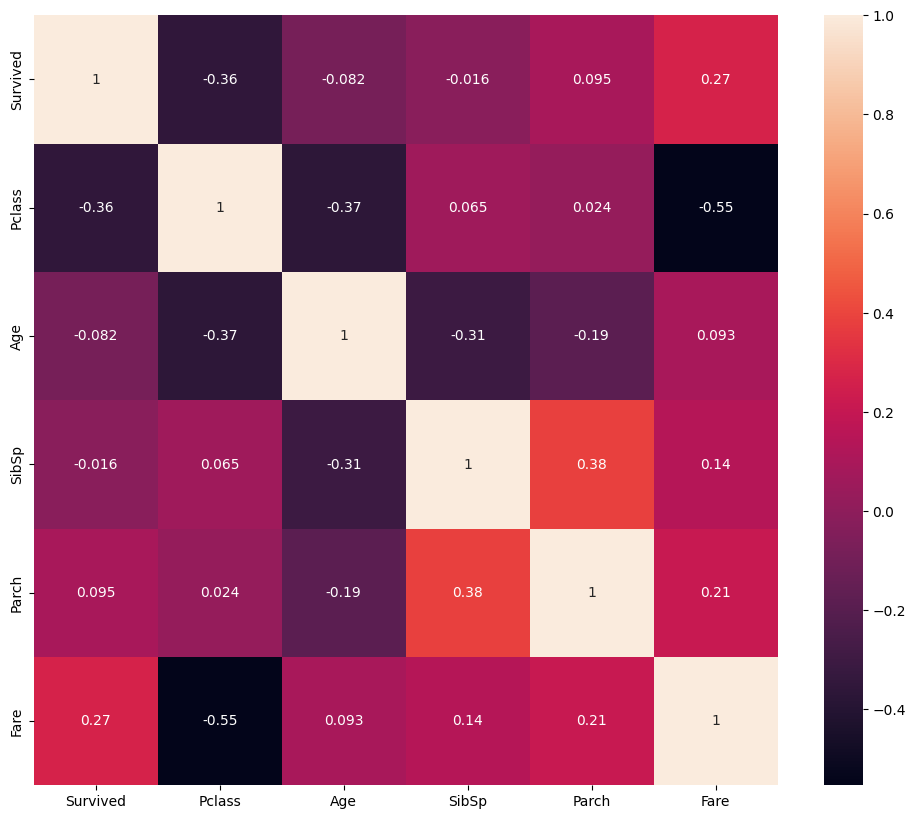

In [22]:
fig, ax = plt.subplots(figsize = (12,10))

sns.heatmap(titanic_df_corr, annot=True)

In [23]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [24]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [25]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


In [41]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,15.0,0,1,211.3375,False,False,True
1,1,1,0,24.0,3,2,263.0000,False,False,True
2,1,2,1,62.0,0,0,10.5000,False,False,True
3,0,2,1,28.0,0,0,13.0000,False,False,True
4,0,1,1,70.0,1,1,71.0000,False,False,True


In [42]:
titanic_df.to_csv('datasets/titanic_train_processed.csv', index=False)

In [43]:
!ls datasets/

housing.csv  titanic_test.csv  titanic_train.csv  titanic_train_processed.csv


In [44]:
df = pd.read_csv('datasets/titanic_train_processed.csv')

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,15.0,0,1,211.3375,False,False,True
1,1,1,0,24.0,3,2,263.0000,False,False,True
2,1,2,1,62.0,0,0,10.5000,False,False,True
3,0,2,1,28.0,0,0,13.0000,False,False,True
4,0,1,1,70.0,1,1,71.0000,False,False,True


In [45]:
df.shape

(712, 10)

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived'], axis=1)
Y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [47]:
x_train.shape, x_test.shape

((569, 9), (143, 9))

In [48]:
from sklearn.linear_model import LogisticRegression
      
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

print('Training Score: ', logistic_model.score(x_train, y_train))

Training Score:  0.7943760984182777


In [49]:
y_pred = logistic_model.predict(x_test)

In [50]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
207,1,1
572,1,0
198,0,0
694,0,0
230,1,1
13,1,1
315,1,1
266,1,1
199,0,0
594,0,0


In [51]:
df_crosstab = pd.crosstab(df_pred_actual.actual, df_pred_actual.predicted)

df_crosstab

predicted,0,1
actual,,
0,77,12
1,16,38


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

Accuracy Score:  0.8041958041958042
Precision Score:  0.76
Recall Score:  0.7037037037037037


# Multiple Classification Models

In [53]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [54]:
df = pd.read_csv('datasets/titanic_train_processed.csv')

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,15.0,0,1,211.3375,False,False,True
1,1,1,0,24.0,3,2,263.0000,False,False,True
2,1,2,1,62.0,0,0,10.5000,False,False,True
3,0,2,1,28.0,0,0,13.0000,False,False,True
4,0,1,1,70.0,1,1,71.0000,False,False,True


In [55]:
FEATURES = list(df.columns[1:])
FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [56]:
result_dict = {}

In [57]:
def summarize_classification(y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'accuracy_count': num_acc}

In [1]:
def build_model(classifier_fn,
                name_of_y_col,
                name_of_x_cols,
                dataset,
                test_frac = 0.2):
    
    X = df[name_of_x_cols]
    Y = df[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

    model = classifier_fn(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)

    pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return {'training': train_summary,
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [105]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training Data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test Data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])

        print()
        print('Confusion Matrix')
        print(result_dict[key]['confusion_matrix'])

        print()
        print('*'*10)

## Logistic Regression

In [76]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)

    return model

In [77]:
result_dict['survived ~ logistic'] = build_model(logistic_fn,
                                                 'Survived',
                                                 FEATURES,
                                                 df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40


## Linear Discrimant Analysis (LDA)

In [80]:
def linear_discriminant_fn(x_train, y_train, solver='svd'):
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)

    return model

In [83]:
result_dict['survived ~ lda'] = build_model(linear_discriminant_fn,
                                                 'Survived',
                                                 FEATURES,
                                                 df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40

Classification:  survived ~ lda

Training Data
accuracy 0.7926186291739895
precision 0.7763157894736842
recall 0.7254098360655737
accuracy_count 451

Test Data
accuracy 0.7832167832167832
precision 0.6382978723404256
recall 0.6818181818181818
accuracy_count 112

Confusion Matrix
y_test   0   1
y_pred        
0       82  14
1       17  30



## Quadratic Discriminant Analysis (QDA)

In [107]:
def quad_discriminant_fn(x_train, y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train, y_train)

    return model

In [86]:
result_dict['survived ~ qda'] = build_model(quad_discriminant_fn,
                                                 'Survived',
                                                 FEATURES[0:-1],
                                                 df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40

Classification:  survived ~ lda

Training Data
accuracy 0.7926186291739895
precision 0.7763157894736842
recall 0.7254098360655737
accuracy_count 451

Test Data
accuracy 0.7832167832167832
precision 0.6382978723404256
recall 0.6818181818181818
accuracy_count 112

Confusion Matrix
y_test   0   1
y_pred        
0       82  14
1       17  30

Classification:  survived ~ qda

Training Data
accuracy 0.8066783831282952
precision 0.7926267281105991
recall 0.7257383966244726
accuracy_count 459

Test Data
accuracy 0.7972027972027972
precision 0.7115384615384616
recall 0.7254901960784313
accuracy_count 114

Confusion Matrix
y_test   0   1
y_pred        
0  

## Stochastic Gradient Descent (SGD)

In [99]:
 def sgd_fn(x_train, y_train, max_iter=10000, tol=1e-3):
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)

    return model

In [100]:
result_dict['survived ~ sgd'] = build_model(sgd_fn,
                                            'Survived',
                                            FEATURES,
                                            df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40

Classification:  survived ~ lda

Training Data
accuracy 0.7926186291739895
precision 0.7763157894736842
recall 0.7254098360655737
accuracy_count 451

Test Data
accuracy 0.7832167832167832
precision 0.6382978723404256
recall 0.6818181818181818
accuracy_count 112

Confusion Matrix
y_test   0   1
y_pred        
0       82  14
1       17  30

Classification:  survived ~ qda

Training Data
accuracy 0.8066783831282952
precision 0.7926267281105991
recall 0.7257383966244726
accuracy_count 459

Test Data
accuracy 0.7972027972027972
precision 0.7115384615384616
recall 0.7254901960784313
accuracy_count 114

Confusion Matrix
y_test   0   1
y_pred        
0  

## Linear Support Vector Classifier (SVC)

In [101]:
 def linear_svc_fn(x_train, y_train, max_iter=10000, tol=1e-3, C=1.0):
    model = LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train)

    return model

In [106]:
result_dict['survived ~ linear_svc'] = build_model(linear_svc_fn,
                                                   'Survived',
                                                    FEATURES,
                                                    df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40

**********
Classification:  survived ~ lda

Training Data
accuracy 0.7926186291739895
precision 0.7763157894736842
recall 0.7254098360655737
accuracy_count 451

Test Data
accuracy 0.7832167832167832
precision 0.6382978723404256
recall 0.6818181818181818
accuracy_count 112

Confusion Matrix
y_test   0   1
y_pred        
0       82  14
1       17  30

**********
Classification:  survived ~ qda

Training Data
accuracy 0.8066783831282952
precision 0.7926267281105991
recall 0.7257383966244726
accuracy_count 459

Test Data
accuracy 0.7972027972027972
precision 0.7115384615384616
recall 0.7254901960784313
accuracy_count 114

Confusion Matrix
y_test   0 

## Radius Neighbours Classifier

In [108]:
def radius_neighbour_fn(x_train, y_train, radius=40.0):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)

    return model

In [109]:
result_dict['survived ~ radius_neighbour'] = build_model(radius_neighbour_fn,
                                                   'Survived',
                                                    FEATURES,
                                                    df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40

**********
Classification:  survived ~ lda

Training Data
accuracy 0.7926186291739895
precision 0.7763157894736842
recall 0.7254098360655737
accuracy_count 451

Test Data
accuracy 0.7832167832167832
precision 0.6382978723404256
recall 0.6818181818181818
accuracy_count 112

Confusion Matrix
y_test   0   1
y_pred        
0       82  14
1       17  30

**********
Classification:  survived ~ qda

Training Data
accuracy 0.8066783831282952
precision 0.7926267281105991
recall 0.7257383966244726
accuracy_count 459

Test Data
accuracy 0.7972027972027972
precision 0.7115384615384616
recall 0.7254901960784313
accuracy_count 114

Confusion Matrix
y_test   0 

## Decision Trees Classifier

In [110]:
def decision_tree_fn(x_train, y_train, max_depth=None, max_features=None):
    
    model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    model.fit(x_train, y_train)

    return model

In [111]:
result_dict['survived ~ decision_tree'] = build_model(decision_tree_fn,
                                                   'Survived',
                                                    FEATURES,
                                                    df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40

**********
Classification:  survived ~ lda

Training Data
accuracy 0.7926186291739895
precision 0.7763157894736842
recall 0.7254098360655737
accuracy_count 451

Test Data
accuracy 0.7832167832167832
precision 0.6382978723404256
recall 0.6818181818181818
accuracy_count 112

Confusion Matrix
y_test   0   1
y_pred        
0       82  14
1       17  30

**********
Classification:  survived ~ qda

Training Data
accuracy 0.8066783831282952
precision 0.7926267281105991
recall 0.7257383966244726
accuracy_count 459

Test Data
accuracy 0.7972027972027972
precision 0.7115384615384616
recall 0.7254901960784313
accuracy_count 114

Confusion Matrix
y_test   0 

## Naive Bayes Classifier 

In [112]:
def naive_bayes_fn(x_train, y_train, priors=None):
    
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)

    return model 

In [113]:
result_dict['survived ~ naive_bayes'] = build_model(naive_bayes_fn,
                                                   'Survived',
                                                    FEATURES,
                                                    df)

compare_results()

Classification:  survived ~ logistic

Training Data
accuracy 0.7873462214411248
precision 0.7641509433962265
recall 0.6952789699570815
accuracy_count 448

Test Data
accuracy 0.8321678321678322
precision 0.8163265306122449
recall 0.7272727272727273
accuracy_count 119

Confusion Matrix
y_test   0   1
y_pred        
0       79  15
1        9  40

**********
Classification:  survived ~ lda

Training Data
accuracy 0.7926186291739895
precision 0.7763157894736842
recall 0.7254098360655737
accuracy_count 451

Test Data
accuracy 0.7832167832167832
precision 0.6382978723404256
recall 0.6818181818181818
accuracy_count 112

Confusion Matrix
y_test   0   1
y_pred        
0       82  14
1       17  30

**********
Classification:  survived ~ qda

Training Data
accuracy 0.8066783831282952
precision 0.7926267281105991
recall 0.7257383966244726
accuracy_count 459

Test Data
accuracy 0.7972027972027972
precision 0.7115384615384616
recall 0.7254901960784313
accuracy_count 114

Confusion Matrix
y_test   0 